In [1]:
import gymnasium
import highway_env

from matplotlib import pyplot as plt
from utils import record_videos, show_videos





In [ ]:
config = {
    "observation": {
        "type": "GrayscaleObservation",
        "observation_shape": (128, 64),
        "stack_size": 4,
        "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
        "scaling": 1.75,
    },
    "policy_frequency": 2
}
env = gymnasium.make('highway-v0',max_episode_steps=-1,config=config)
env.unwrapped.action_type.actions_indexes

{'LANE_LEFT': 0, 'IDLE': 1, 'LANE_RIGHT': 2, 'FASTER': 3, 'SLOWER': 4}

In [3]:
from algorithms.Agent import Agent
from algorithms.RDQN import RDQN

# agent = TestAgent(env)


agent: Agent = RDQN(env,type='cnn')

Using cuda


In [4]:
NUM_EPISODES = 1000
total_rewards = []
discounted_rewards = []

for episode in range(NUM_EPISODES):
    print(f"Episode {episode}")
    
    total_reward = 0
    discounted_reward = 0 
    gamma_pow = 1.0       
    
    done = truncated = False
    obs, info = env.reset()
    
    while not (done or truncated):
        action = agent.predict(obs)

        next_obs, reward, done, truncated, info = env.step(action)
        
        total_reward += reward
        
        discounted_reward += reward * gamma_pow
        gamma_pow *= agent.gamma # Decay the discount factor
        
        agent.learn(obs, action, reward, (done, next_obs))

        obs = next_obs
        
    total_rewards.append(total_reward)
    discounted_rewards.append(discounted_reward)
    
    print(f"Total Reward: {round(total_reward, 2)} | Discounted: {round(discounted_reward, 2)}")

Episode 0
Total Reward: 9.57 | Discounted: 5.68
Episode 1
Total Reward: 27.2 | Discounted: 8.74
Episode 2
Total Reward: 7.64 | Discounted: 4.98
Episode 3
Total Reward: 51.03 | Discounted: 8.35
Episode 4
Total Reward: 62.37 | Discounted: 8.59
Episode 5
Total Reward: 39.39 | Discounted: 7.57
Episode 6
Total Reward: 40.85 | Discounted: 8.61
Episode 7
Total Reward: 28.72 | Discounted: 8.34
Episode 8
Total Reward: 45.7 | Discounted: 7.58
Episode 9
Total Reward: 6.15 | Discounted: 4.54
Episode 10
Total Reward: 5.25 | Discounted: 4.08
Episode 11
Total Reward: 13.07 | Discounted: 6.9
Episode 12
Total Reward: 56.39 | Discounted: 8.65
Episode 13
Total Reward: 7.87 | Discounted: 5.33
Episode 14
Total Reward: 6.09 | Discounted: 4.48
Episode 15
Total Reward: 7.81 | Discounted: 5.28
Episode 16
Total Reward: 12.85 | Discounted: 6.53
Episode 17
Total Reward: 60.0 | Discounted: 8.04
Episode 18
Total Reward: 58.77 | Discounted: 7.43
Episode 19
Total Reward: 53.44 | Discounted: 6.76
Episode 20
Total Rewa

KeyboardInterrupt: 

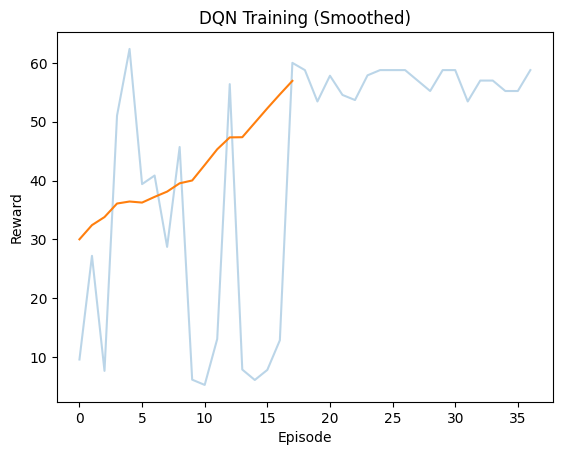

In [5]:
import matplotlib.pyplot as plt
import numpy as np

window = 20
smoothed = np.convolve(total_rewards, np.ones(window)/window, mode='valid')


plt.plot(total_rewards, alpha=0.3)
plt.plot(smoothed)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("DQN Training (Smoothed)")
plt.show()

In [ ]:
NUM_EPISODES = 30
total_rewards = []
env = gymnasium.make('highway-v0', render_mode='rgb_array',config=config)

for episode in range(NUM_EPISODES):
  print(f"Episode {episode}")
  done = truncated = False

  obs, info = env.reset()
  
  while not (done or truncated):
    action = agent.predict(obs)

    next_obs, reward, done, truncated, info = env.step(action)
    print(info)
    obs=next_obs
    env.render()


Episode 0
{'speed': 22.19231193010032, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.0, 'high_speed_reward': np.float64(0.21923119301003205), 'on_road_reward': 1.0}}
{'speed': 20.961246319772037, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.0, 'high_speed_reward': np.float64(0.09612463197720374), 'on_road_reward': 1.0}}
{'speed': 20.421470354920253, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.0, 'high_speed_reward': np.float64(0.04214703549202525), 'on_road_reward': 1.0}}
{'speed': 20.184798897455057, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.0, 'high_speed_reward': np.float64(0.018479889745505674), 'on_road_reward': 1.0}}
{'speed': 20.08102736551202, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.0, 'high_speed_reward': np.float64(0.008102736551202128), 'on_

KeyboardInterrupt: 

: 